In [88]:
## Tomando los datos de Covid-19 en Argentina transformados en el TP3, 
## analizar y justificar el siguiente desarrollo en función del Modelo Unificado de Visualización:

In [89]:
import pandas as pd
import seaborn as sns

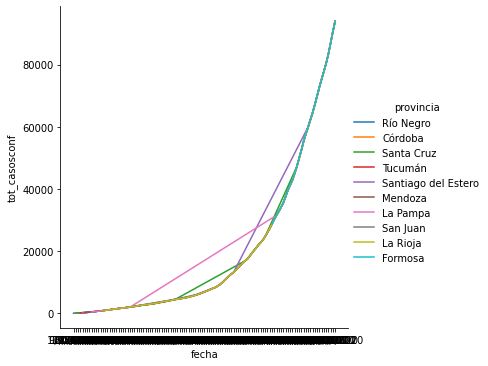

In [90]:
## a. Graficar las curvas de crecimiento de casos totales para las 10 provincias con mayor cantidad de casos.

archivo = pd.read_csv('covid_arg_transformado.csv')
archivo.drop(['Unnamed: 0','dia_inicio','ciudad','nue_casosconf_diff','tot_fallecidos','nue_fallecidos_diff',
                'transmision_tipo','informe_tipo','informe_link'],axis='columns',inplace=True)
archivo = archivo.drop(archivo[archivo['provincia'] == 'Indeterminado'].index)

provincias = archivo.groupby('provincia')
provincias_casos = []
for p in provincias:
    provincias_casos.append({'provincia':p[0],
                            'casos_total':p[1].loc[p[1].index[-1], 'tot_casosconf']})
    
prov_cantidad_casos = sorted(provincias_casos ,key=lambda k: k['casos_total'],reverse=True)


for i in range(10):
    prov_cantidad_casos.pop(i)

 
for p in prov_cantidad_casos:
    archivo = archivo.drop(archivo[archivo['provincia'] == p['provincia']].index)

sns.relplot(data = archivo, x = 'fecha', y = 'tot_casosconf',hue = 'provincia',kind = 'line') 

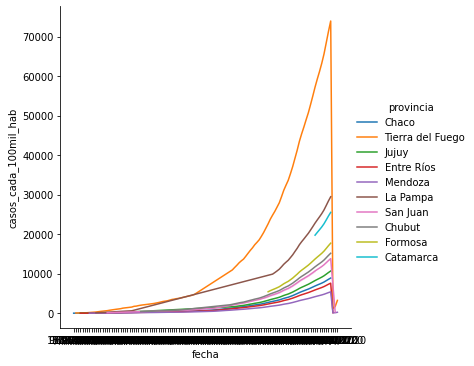

In [127]:
## b. Calcular la penetración de casos (casos cada 100 mil hab.) por provincia y 
##grafique la curva de crecimiento para las 10 provincias con mayor penetración. 
##Comparar los gráficos con el punto anterior. 

archivo = pd.read_csv('covid_arg_transformado.csv')
archivo2 = pd.read_csv('pop_provs.csv')
casos_prov=pd.merge(archivo,archivo2,left_on='provincia',right_on='name')

casos_prov.drop(['Unnamed: 0_x','dia_inicio','ciudad','nue_casosconf_diff','tot_fallecidos','nue_fallecidos_diff',
                'transmision_tipo','informe_tipo','informe_link','Unnamed: 0_y','code','name','pop_dens','country_percentage'],axis='columns',inplace=True)
casos_prov['casos_cada_100mil_hab'] = casos_prov['tot_casosconf'] / (casos_prov['total_pop'] / 100000)

provincias = casos_prov.groupby('provincia')
provincias_casos = []
for p in provincias:
    provincias_casos.append({'provincia':p[0],
                            'total':p[1].loc[p[1].index[-1], 'casos_cada_100mil_hab']})
    
prov_cantidad_casos = sorted(provincias_casos ,key=lambda k: k['total'],reverse=True)


for i in range(10):
    prov_cantidad_casos.pop(i)

for p in prov_cantidad_casos:
    casos_prov = casos_prov.drop(casos_prov[casos_prov['provincia'] == p['provincia']].index)

sns.relplot(data = casos_prov, x = 'fecha', y = 'casos_cada_100mil_hab',hue = 'provincia',kind = 'line') 

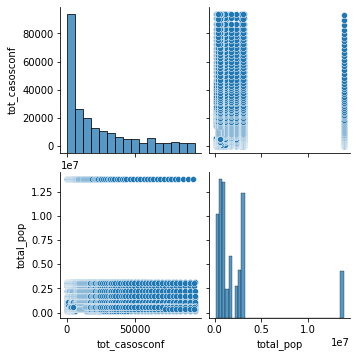

In [134]:
## c. Analizar varias relaciones entre dos variables buscando información valiosa. 
##Por ejemplo, cantidad de casos vs población total,o vs densidad demográfica, etc.

archivo = pd.read_csv('covid_arg_transformado.csv')
archivo2 = pd.read_csv('pop_provs.csv')
join=pd.merge(archivo,archivo2,left_on='provincia',right_on='name')

join.drop(['Unnamed: 0_x','fecha','dia_inicio','ciudad','nue_casosconf_diff','tot_fallecidos','nue_fallecidos_diff',
                'transmision_tipo','informe_tipo','informe_link','Unnamed: 0_y','code','name',
                 'country_percentage'],axis='columns',inplace=True)
sns.pairplot(data = join)